In [ ]:
## CSCI 4150U - Data Mining - Lab 3 (German dataset)
# Name: Thinh Le
# Student ID: 100741899

In [992]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import fmean
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [993]:
headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'Class']
data = pd.read_csv('./data1/german.data', header=None, names=headers, delimiter=' ')
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [994]:
# Creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for col in data.select_dtypes(include=['object']).columns.tolist():
    data[col + '_N'] = labelencoder.fit_transform(data[col])
    data.drop(columns=[col], inplace=True)
data

,A2,A5,A8,A11,A13,A16,A18,Class,A1_N,A3_N,...,A6_N,A7_N,A9_N,A10_N,A12_N,A14_N,A15_N,A17_N,A19_N,A20_N
0,6,1169,4,4,67,2,1,1,0,4,...,4,4,2,0,0,2,1,2,1,0
1,48,5951,2,2,22,1,1,2,1,2,...,0,2,1,0,0,2,1,2,0,0
2,12,2096,2,3,49,1,2,1,3,4,...,0,3,2,0,0,2,1,1,0,0
3,42,7882,2,4,45,1,2,1,0,2,...,0,3,2,2,1,2,2,2,0,0
4,24,4870,3,4,53,2,2,2,0,3,...,0,2,2,0,3,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,3,2,...,0,3,1,0,0,2,1,1,0,0
996,30,3857,4,4,40,1,1,1,0,2,...,0,2,0,0,1,2,1,3,1,0
997,12,804,4,4,38,1,1,1,3,2,...,0,4,2,0,2,2,1,2,0,0
998,45,1845,4,4,23,1,1,2,0,2,...,0,2,2,0,3,2,2,2,1,0


In [995]:
Y = data['Class']
X = data.drop(columns=['Class'])

In [996]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [997]:
# Using Holdout
accuracy = []
precision = []
fmeasure = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_test)
    # Calculate accuracY, precision, and f-measure
    accuracy.append(accuracy_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred))
    fmeasure.append(f1_score(Y_test, Y_pred))
# Calculate average accuracY, precision, and f-measure
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('F-measure: ' + str(fmeasure))
print('Avg. Accuracy: ' + str(fmean(accuracy)))
print('Avg. Precision: ' + str(fmean(precision)))
print('Avg. F-measure: ' + str(fmean(fmeasure)))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
accuracy.append(fmean(accuracy))
precision.append(fmean(precision))
fmeasure.append(fmean(fmeasure))
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.71, 0.74, 0.81, 0.72, 0.75]
Precision: [0.7894736842105263, 0.7471264367816092, 0.8536585365853658, 0.7402597402597403, 0.8181818181818182]
F-measure: [0.8053691275167785, 0.8333333333333334, 0.880503144654088, 0.8028169014084509, 0.8344370860927152]
Avg. Accuracy: 0.746
Avg. Precision: 0.789740043203812
Avg. F-measure: 0.8312919186010731


,Accuracy,Precision,F-measure
#1,0.710,0.789474,0.805369
#2,0.740,0.747126,0.833333
#3,0.810,0.853659,0.880503
#4,0.720,0.740260,0.802817
#5,0.750,0.818182,0.834437
Avg.,0.746,0.789740,0.831292


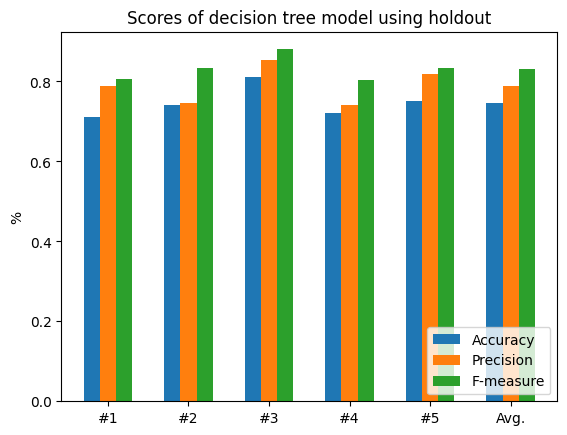

In [998]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using holdout')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [999]:
# Using cross-validation
scoring = ['accuracy', 'precision', 'f1']
scores = cross_validate(clf, X, Y, cv=10, scoring=scoring, return_train_score=False)
print('Accuracy: ' + str(scores['test_accuracy']))
print('Precision: ' + str(scores['test_precision']))
print('F-measure: ' + str(scores['test_f1']))
print('Avg Accuracy: ' + str(scores['test_accuracy'].mean()))
print('Avg Precision: ' + str(scores['test_precision'].mean()))
print('Avg F-measure: ' + str(scores['test_f1'].mean()))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
accuracy = np.append(scores['test_accuracy'], scores['test_accuracy'].mean())
precision = np.append(scores['test_precision'], scores['test_precision'].mean())
fmeasure = np.append(scores['test_f1'], scores['test_f1'].mean())
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.8  0.71 0.72 0.72 0.75 0.72 0.69 0.74 0.75 0.68]
Precision: [0.83783784 0.75949367 0.77631579 0.7625     0.75862069 0.72826087
 0.73493976 0.7972973  0.78481013 0.796875  ]
F-measure: [0.86111111 0.80536913 0.80821918 0.81333333 0.84076433 0.82716049
 0.79738562 0.81944444 0.83221477 0.76119403]
Avg Accuracy: 0.728
Avg Precision: 0.7736951040333708
Avg F-measure: 0.8166196435391659


,Accuracy,Precision,F-measure
#1,0.800,0.837838,0.861111
#2,0.710,0.759494,0.805369
#3,0.720,0.776316,0.808219
#4,0.720,0.762500,0.813333
#5,0.750,0.758621,0.840764
#6,0.720,0.728261,0.827160
#7,0.690,0.734940,0.797386
#8,0.740,0.797297,0.819444
#9,0.750,0.784810,0.832215
#10,0.680,0.796875,0.761194


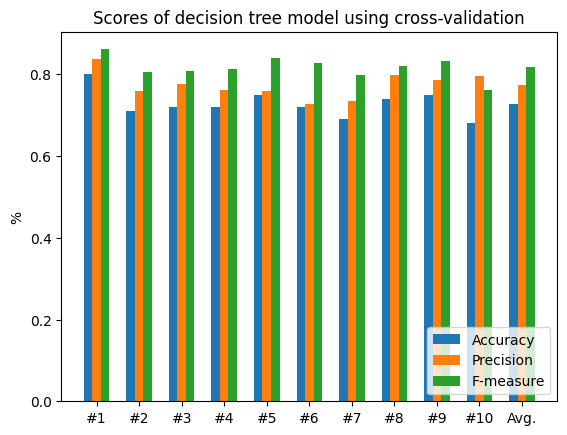

In [1000]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using cross-validation')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [1001]:
accuracy_1 = accuracy

In [1002]:
# Select the EntropY as the impuritY measure
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [1003]:
# Using Holdout
accuracy = []
precision = []
fmeasure = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_test)
    # Calculate accuracY, precision, and f-measure
    accuracy.append(accuracy_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred))
    fmeasure.append(f1_score(Y_test, Y_pred))
# Calculate average accuracY, precision, and f-measure
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('F-measure: ' + str(fmeasure))
print('Avg. Accuracy: ' + str(fmean(accuracy)))
print('Avg. Precision: ' + str(fmean(precision)))
print('Avg. F-measure: ' + str(fmean(fmeasure)))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
accuracy.append(fmean(accuracy))
precision.append(fmean(precision))
fmeasure.append(fmean(fmeasure))
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.68, 0.82, 0.75, 0.74, 0.7]
Precision: [0.7317073170731707, 0.8674698795180723, 0.8, 0.775, 0.75]
F-measure: [0.7894736842105263, 0.8888888888888888, 0.8175182481751825, 0.8266666666666667, 0.7826086956521738]
Avg. Accuracy: 0.738
Avg. Precision: 0.7848354393182486
Avg. F-measure: 0.8210312367186876


,Accuracy,Precision,F-measure
#1,0.680,0.731707,0.789474
#2,0.820,0.867470,0.888889
#3,0.750,0.800000,0.817518
#4,0.740,0.775000,0.826667
#5,0.700,0.750000,0.782609
Avg.,0.738,0.784835,0.821031


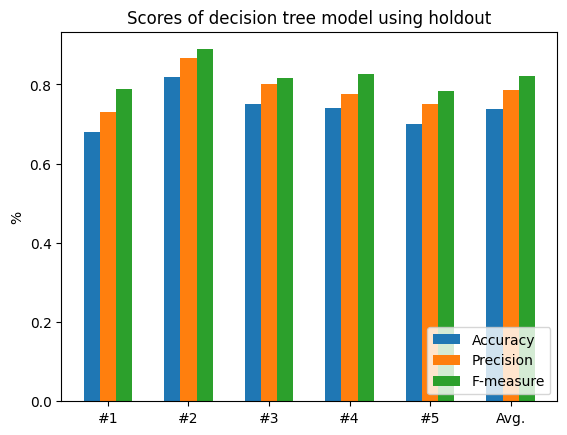

In [1004]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using holdout')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [1005]:
# Using cross-validation
scoring = ['accuracy', 'precision', 'f1']
scores = cross_validate(clf, X, Y, cv=10, scoring=scoring, return_train_score=False)
print('Accuracy: ' + str(scores['test_accuracy']))
print('Precision: ' + str(scores['test_precision']))
print('F-measure: ' + str(scores['test_f1']))
print('Avg Accuracy: ' + str(scores['test_accuracy'].mean()))
print('Avg Precision: ' + str(scores['test_precision'].mean()))
print('Avg F-measure: ' + str(scores['test_f1'].mean()))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
accuracy = np.append(scores['test_accuracy'], scores['test_accuracy'].mean())
precision = np.append(scores['test_precision'], scores['test_precision'].mean())
fmeasure = np.append(scores['test_f1'], scores['test_f1'].mean())
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.76 0.71 0.73 0.72 0.75 0.72 0.7  0.76 0.75 0.69]
Precision: [0.74468085 0.75949367 0.77922078 0.7625     0.75862069 0.79166667
 0.72727273 0.80263158 0.78481013 0.8       ]
F-measure: [0.85365854 0.80536913 0.81632653 0.81333333 0.84076433 0.8028169
 0.81012658 0.83561644 0.83221477 0.77037037]
Avg Accuracy: 0.7289999999999999
Avg Precision: 0.7710897090294898
Avg F-measure: 0.8180596916772052


,Accuracy,Precision,F-measure
#1,0.760,0.744681,0.853659
#2,0.710,0.759494,0.805369
#3,0.730,0.779221,0.816327
#4,0.720,0.762500,0.813333
#5,0.750,0.758621,0.840764
#6,0.720,0.791667,0.802817
#7,0.700,0.727273,0.810127
#8,0.760,0.802632,0.835616
#9,0.750,0.784810,0.832215
#10,0.690,0.800000,0.770370


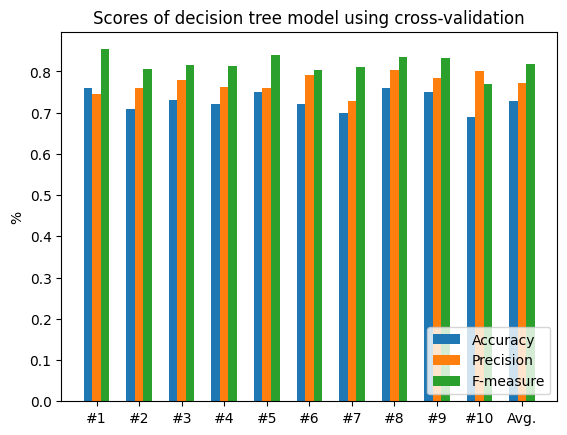

In [1006]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using cross-validation')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [1007]:
accuracy_2 = accuracy

In [1008]:
# Compare the final accuracy of cross-validation of Part I and II
table_data = {'Using Gini': accuracy_1, 'Using Entropy': accuracy_2}
table = pd.DataFrame(table_data, index=index)
table

,Using Gini,Using Entropy
#1,0.800,0.760
#2,0.710,0.710
#3,0.720,0.730
#4,0.720,0.720
#5,0.750,0.750
#6,0.720,0.720
#7,0.690,0.700
#8,0.740,0.760
#9,0.750,0.750
#10,0.680,0.690


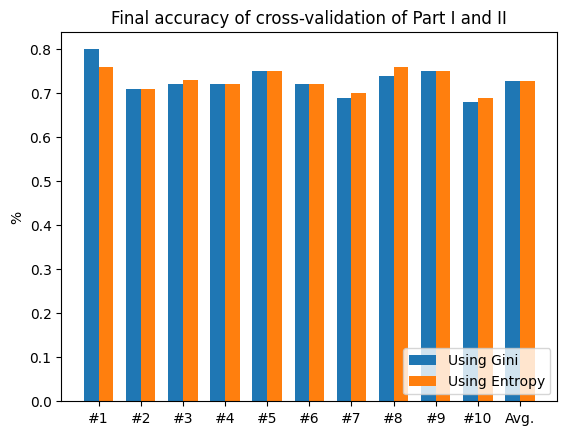

In [1009]:
# Compare the final accuracy of cross-validation of Part I and II
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_1, width, label='Using Gini')
rects3 = ax.bar(x + width/2, accuracy_2, width, label='Using Entropy')
ax.set_ylabel('%')
ax.set_title('Final accuracy of cross-validation of Part I and II')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

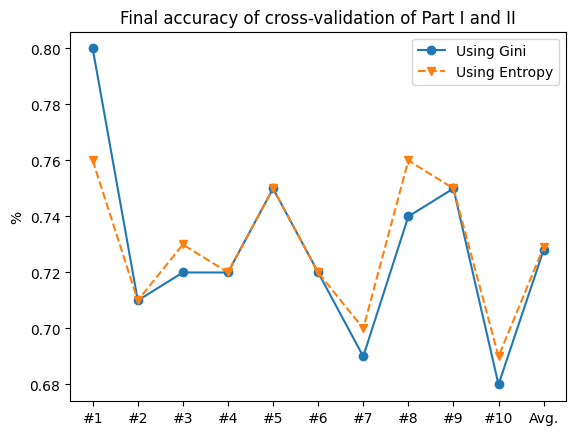

In [1010]:
# Compare the final accuracy of cross-validation of Part I and II
plt.plot(labels, accuracy_1, 'o-', labels, accuracy_2, 'v--')
plt.ylabel('%')
plt.title('Final accuracy of cross-validation of Part I and II')
plt.legend(['Using Gini', 'Using Entropy'], loc='upper right')
plt.show()

In [1011]:
# There is little to no difference between the 2 impurity measures.
# Using Entropy has slightly higher accuracy than using Gini.

Text(0, 0.5, 'Accuracy')

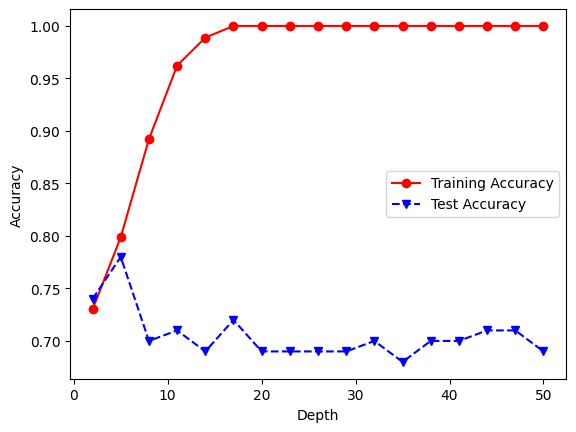

In [1012]:
depths = []
for i in range(2, 51, 3):
    depths.append(i)
trainAcc = np.zeros(len(depths))
testAcc = np.zeros(len(depths))
# Split the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
index = 0
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_pred_train)
    testAcc[index] = accuracy_score(Y_test, Y_pred_test)
    index += 1
plt.plot(depths, trainAcc, 'ro-', depths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [1013]:
# The plot above shows that training accuracy will continue to improve
#   as the maximum depth of the tree increases (the model becomes more complex).
# However, the testing accuracy initially improves up to a maximum depth of 5, 
#   before it accuracy gradually decreases due to model overfitting.